# RQ4A_JavaScript_dates_(Publication-Intro)
## RQ4 (A): How long does it take to discover a vulnerability in the ecosystem
## 10. Vulnerability Lifecycle

## 10.3 Publication delays 

date published - date introduced

In [11]:
#zdi = pd.read_csv('../data/offline_data/new_zdi.csv')
#1
#zdi = pd.read_csv('../data/java/all.csv',encoding='latin1', low_memory=False)
#2
#zdi = pd.read_csv('../data/java/dates.csv',encoding='latin1', low_memory=False)
import pandas as pd
zdi = pd.read_csv('../data/javascript/all.csv',encoding='latin1', low_memory=False)


In [12]:
#--------works 1
#zdi.date_published=pd.to_datetime(zdi.date_published)
#zdi.date_modified=pd.to_datetime(zdi.date_modified)
#zdi['time_delta'] = zdi['date_published'].sub(zdi['date_modified'], axis=0).dt.days

#--------works 2
import pandas as pd
zdi.date_intro=pd.to_datetime(zdi.date_intro)
zdi.date_published=pd.to_datetime(zdi.date_published)
zdi['time_delta'] = zdi['date_published'].sub(zdi['date_intro'], axis=0).dt.days

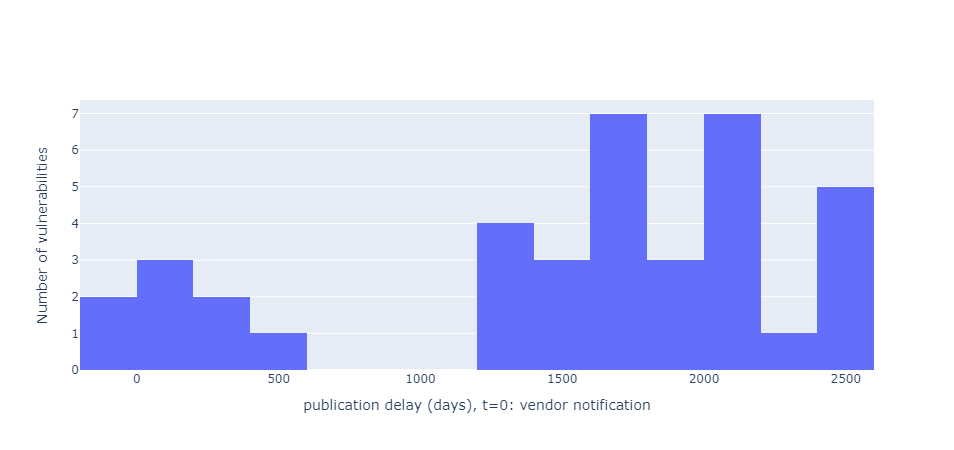

In [13]:
#--------- works 1
import plotly.graph_objs as go
fig=go.Figure(data=[go.Histogram(x=zdi.time_delta)])
fig.update_layout(xaxis_title='publication delay (days), t=0: vendor notification', yaxis_title='Number of vulnerabilities')

#--------- works 2
#fig=go.Figure(data=[go.Histogram(x=zdi.time_delta)])
#fig.update_layout(xaxis_title='publication delay (days), t=0: vendor notification', yaxis_title='Number of vulnerabilities')


In [14]:
## 10.3 Finding on average a vulnerability is published x days after been introduced

In [15]:
zdi.time_delta.describe()

count      38.000000
mean     1526.578947
std       812.176510
min      -133.000000
25%      1281.250000
50%      1696.000000
75%      2028.000000
max      2552.000000
Name: time_delta, dtype: float64

Let's distribute the above to the different severity level shares:

In [6]:
def cvss_to_severity(score):
    if score==0: 
        s="NONE"
    if (score>0) and (score<4):
        s="LOW"
    if (score>=4) and (score<7):
        s="MEDIUM"
    if (score>=7) and (score<9):
        s="HIGH"
    if score>=9:
        s="CRITICAL"
    return s

In [7]:
zdi['severity']=zdi.cvss3_bscore.map(cvss_to_severity)

In [10]:

rp.summary_cont(zdi.groupby('severity'))[['time_delta']]

NameError: name 'rp' is not defined